In [1]:
! pip install "everywhereml>=0.2.32"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.6 MB/s eta 0:00:00
  Created wheel for everywhereml: filename=everywhereml-0.2.37-py3-none-any.whl size=81193 sha256=66af096c3f466e1b143aaa3b6ad10c0e29cd250ec54eaa8c2b8a5c7b54e8f677
  Stored in directory: /root/.cache/pip/wheels/f0/08/8c/4848a3a49c6b89689c1366cca928db3058dd1f414b03055f15
  Created wheel for hexdump: filename=hexdump-3.3-py3-none-any.whl size=8894 sha256=6ddb0d168668f843a73d3f39827c99c410bfff0a2830d1f2bf38c8a99f1e9aff
  Stored in directory: /root/.cache/pip/wheels/26/28/f7/f47d7ecd9ae44c4457e72c8bb617ef18ab332ee2b2a1047e87
  Created wheel for umap-learn:

In [2]:
pip install tinymlgen

  Preparing metadata (setup.py) ... done
  Created wheel for tinymlgen: filename=tinymlgen-0.2-py3-none-any.whl size=2225 sha256=43d85274d2f445d0bede7f335f8e7d91daa31da8b4700eafee5287271a300581
  Stored in directory: /root/.cache/pip/wheels/37/f6/60/b245c012a863872e10d737539c1e3f2db0499dfb6735f48494
Successfully built tinymlgen


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive')

# Cargar tu conjunto de datos
data = pd.read_csv("/content/drive/My Drive/Trabajo de Grado/Tesis/Pruebas/Multicriterio/Datasets/datos_predichosARBOL.csv")

Mounted at /content/drive


In [4]:
# Definir variables predictoras (X) y variable objetivo (Y)
X = data.iloc[:, 0:4]
Y = data.iloc[:, 5]

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Codificar la variable objetivo
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
Y_encoded

array([3, 0, 0, ..., 0, 2, 0])

In [6]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Aplicar SMOTE para el sobre-muestreo de la clase minoritaria
smote = SMOTE(random_state=50)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [7]:
# Construir una red neuronal para clasificación multicriterio usando TensorFlow/Keras
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(4, activation='softmax')  # Utiliza 'softmax' para clasificación multicriterio
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_resampled, Y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
489/489 [==============================] - 4s 6ms/step - loss: 0.8710 - accuracy: 0.7035 - val_loss: 0.4869 - val_accuracy: 0.8565
Epoch 2/10
489/489 [==============================] - 2s 4ms/step - loss: 0.2670 - accuracy: 0.9459 - val_loss: 0.2215 - val_accuracy: 0.9475
Epoch 3/10
489/489 [==============================] - 2s 5ms/step - loss: 0.1436 - accuracy: 0.9736 - val_loss: 0.1495 - val_accuracy: 0.9640
Epoch 4/10
489/489 [==============================] - 3s 7ms/step - loss: 0.1012 - accuracy: 0.9818 - val_loss: 0.1092 - val_accuracy: 0.9755
Epoch 5/10
489/489 [==============================] - 3s 6ms/step - loss: 0.0792 - accuracy: 0.9864 - val_loss: 0.1010 - val_accuracy: 0.9655
Epoch 6/10
489/489 [==============================] - 4s 8ms/step - loss: 0.0658 - accuracy: 0.9885 - val_loss: 0.0787 - val_accuracy: 0.9850
Epoch 7/10
489/489 [==============================] - 3s 6ms/step - loss: 0.0559 - accuracy: 0.9907 - val_loss: 0.0706 - val_accuracy: 0.9870
Epoch 

In [8]:
# port to C++
from tinymlgen import port

print(port(model, optimize=False))

# Obtener el código C++ para microcontroladores
codigo_cxx = port(model)

# Guardar el código en un archivo
nombre_archivo = "RN.txt"
with open(nombre_archivo, "w") as archivo:
    print(codigo_cxx, file=archivo)


#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char model_data[] DATA_ALIGN_ATTRIBUTE = {0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x90, 0x00, 0x00, 0x00, 0xe8, 0x00, 0x00, 0x00, 0xcc, 0x0d, 0x00, 0x00, 0xdc, 0x0d, 0x00, 0x00, 0x98, 0x13, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0a, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x38, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65,

In [9]:

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')

63/63 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9965
Precisión en el conjunto de prueba: 0.9965000152587891


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.utils import to_categorical

# Realizar predicciones en el conjunto de prueba
y_pred_probabilities = model.predict(X_test)

# Convertir las probabilidades a etiquetas de clase
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Convertir las etiquetas reales a formato one-hot
Y_test_onehot = to_categorical(Y_test, num_classes=4)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(np.argmax(Y_test_onehot, axis=1), y_pred_labels)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular métricas adicionales
accuracy = accuracy_score(np.argmax(Y_test_onehot, axis=1), y_pred_labels)
precision = precision_score(np.argmax(Y_test_onehot, axis=1), y_pred_labels, average='weighted')
recall = recall_score(np.argmax(Y_test_onehot, axis=1), y_pred_labels, average='weighted')
f1 = f1_score(np.argmax(Y_test_onehot, axis=1), y_pred_labels, average='weighted')

print(f'Exactitud (Accuracy): {accuracy}')
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

63/63 [==============================] - 0s 3ms/step
Matriz de Confusión:
[[954   0   0   6]
 [  0  43   0   0]
 [  0   1 497   0]
 [  0   0   0 499]]
Exactitud (Accuracy): 0.9965
Precisión (Precision): 0.99654700720072
Recall: 0.9965
F1 Score: 0.996506884256006


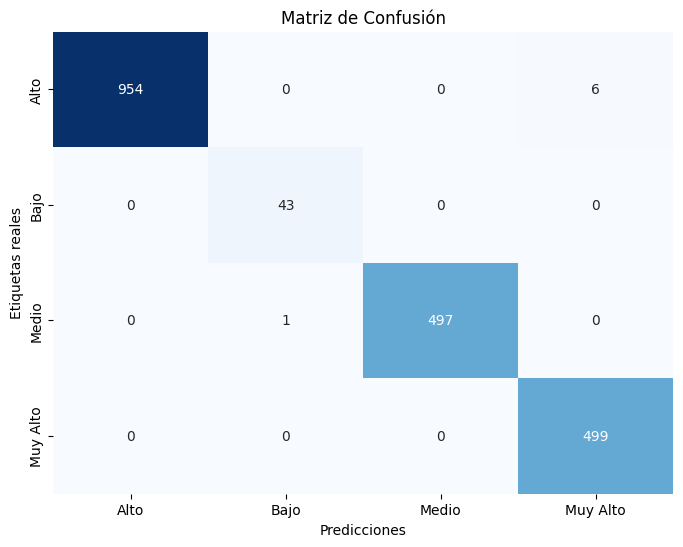

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Etiquetas de las clases
class_names = ['Alto', 'Bajo', 'Medio', 'Muy Alto']

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

In [16]:

# Calcular la exactitud (Accuracy)
accuracy = accuracy_score(Y_test, y_pred_labels)
print(f"Exactitud (Accuracy): {accuracy}")

# Reporte de Clasificación (precision, recall, f1-score)
reporte_clasificacion = classification_report(Y_test, y_pred_labels)
print("Reporte de Clasificación:")
print(reporte_clasificacion)

Exactitud (Accuracy): 0.9965
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       960
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00       498
           3       0.99      1.00      0.99       499

    accuracy                           1.00      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000

